In [1]:
# Importing libraries
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### EDA and Pre-Processing

In [2]:
# reading in the dataset
import pandas as pd

df = pd.read_csv("Complete_Pokedex.csv")

In [3]:
# Viewing columns of dataset
df.columns

Index(['pokedex_number', 'pokemon_name', 'type_1', 'type_2', 'ability_1',
       'ability_2', 'ability_3', 'number_pokemon_with_typing', 'primary_color',
       'shape', 'height', 'weight', 'bmi', 'hit_points', 'attack', 'defense',
       'special_attack', 'special_defense', 'speed', 'total_stats', 'mean',
       'standard_deviation', 'capture_rate', 'generation', 'base_happiness',
       'base_experience', 'exp_type', 'exp_to_level_100', 'can_evolve',
       'evolves_from', 'final_evolution', 'mega_evolution', 'is_default',
       'baby_pokemon', 'alolan_form', 'galarian_form', 'forms_switchable',
       'legendary', 'mythical', 'genderless', 'female_rate', 'genus',
       'egg_group_1', 'egg_group_2', 'egg_cycles', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fighting', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', '

In [4]:
# filtering dataset
df_types = df[['pokedex_number', 'pokemon_name', 'type_1', 'type_2']]
df_types.head()

,pokedex_number,pokemon_name,type_1,type_2
0,1,Bulbasaur,Grass,Poison
1,2,Ivysaur,Grass,Poison
2,3,Mega Venusaur,Grass,Poison
3,3,Venusaur,Grass,Poison
4,3,Venusaur Gmax,Grass,Poison


In [5]:
import os
# Step 1: Load filtered metadata
# Make sure it has these columns: pokedex_number, name, type1, type2

# Step 2: Load filenames from the image folder
image_folder = "pokemon_png"
image_files = os.listdir(image_folder)

# Step 3: Parse filenames into pokedex_number and form
def parse_filename(filename):
    name = filename.replace(".png", "")
    parts = name.split("-")
    try:
        number = int(parts[0])
        form = parts[1] if len(parts) > 1 else "base"
    except ValueError:
        number = None
        form = "unknown"
    return number, form

image_data = []
for file in image_files:
    pokedex_number, form = parse_filename(file)
    image_data.append({
        "filename": file,
        "pokedex_number": pokedex_number,
        "form": form
    })

image_df = pd.DataFrame(image_data)

In [6]:
# reordering data frame in proper order of pokedex

image_df = pd.DataFrame(image_data)
image_df['pokedex_number'] = pd.to_numeric(image_df['pokedex_number'], errors='coerce')
image_df = image_df.sort_values(by='pokedex_number')

In [7]:
# converting pokedex number to int
image_df['pokedex_number'] = pd.to_numeric(image_df['pokedex_number'], errors='coerce').astype('Int64')
image_df.head()

,filename,pokedex_number,form
0,1.png,1,base
120,2.png,2,base
245,3-mega.png,3,mega
246,3.png,3,base
378,4.png,4,base


In [8]:
# keeping only base form pokemon
image_df = image_df[image_df['form'] == 'base']
image_df.head()

,filename,pokedex_number,form
0,1.png,1,base
120,2.png,2,base
246,3.png,3,base
378,4.png,4,base
508,5.png,5,base


In [9]:
# Step 4: Merge on pokedex_number
merged_df = pd.merge(image_df, df_types, on="pokedex_number", how="left")

In [10]:
# inspecting dataframe

print(merged_df.shape)
merged_df.head()

(838, 6)


,filename,pokedex_number,form,pokemon_name,type_1,type_2
0,1.png,1,base,Bulbasaur,Grass,Poison
1,2.png,2,base,Ivysaur,Grass,Poison
2,3.png,3,base,Mega Venusaur,Grass,Poison
3,3.png,3,base,Venusaur,Grass,Poison
4,3.png,3,base,Venusaur Gmax,Grass,Poison


In [11]:
# saving dataframe
merged_df.to_csv("merged.csv")

In [12]:
# removing any pokemon variants
poke_data = merged_df.copy()
poke_data = poke_data[~poke_data['pokemon_name'].str.contains(' ', na=False)]
poke_data.head()

,filename,pokedex_number,form,pokemon_name,type_1,type_2
0,1.png,1,base,Bulbasaur,Grass,Poison
1,2.png,2,base,Ivysaur,Grass,Poison
3,3.png,3,base,Venusaur,Grass,Poison
5,4.png,4,base,Charmander,Fire,NaN
6,5.png,5,base,Charmeleon,Fire,NaN


In [13]:
poke_data.shape

(693, 6)

In [14]:
# saving updated dataframe
poke_data.to_csv("merged.csv", index = False)

In [15]:
# inspecting to see if changes took
poke_data.head(30)

,filename,pokedex_number,form,pokemon_name,type_1,type_2
0,1.png,1,base,Bulbasaur,Grass,Poison
1,2.png,2,base,Ivysaur,Grass,Poison
3,3.png,3,base,Venusaur,Grass,Poison
5,4.png,4,base,Charmander,Fire,NaN
6,5.png,5,base,Charmeleon,Fire,NaN
7,6.png,6,base,Charizard,Fire,Flying
11,7.png,7,base,Squirtle,Water,NaN
12,8.png,8,base,Wartortle,Water,NaN
13,9.png,9,base,Blastoise,Water,NaN
16,10.png,10,base,Caterpie,Bug,NaN


### Inspecting Dataset

In [16]:
import pandas as pd
df = pd.read_csv("merged.csv")

In [17]:
df.head()

,filename,pokedex_number,form,pokemon_name,type_1,type_2
0,1.png,1,base,Bulbasaur,Grass,Poison
1,2.png,2,base,Ivysaur,Grass,Poison
2,3.png,3,base,Venusaur,Grass,Poison
3,4.png,4,base,Charmander,Fire,NaN
4,5.png,5,base,Charmeleon,Fire,NaN


In [18]:
from PIL import Image
import numpy as np

# Folder where your images are stored
image_dir = "pokemon_png"

# Target image size
IMG_SIZE = (224, 224)

def load_image(filename):
    path = os.path.join(image_dir, filename)
    img = Image.open(path).convert("RGB").resize(IMG_SIZE)
    img_array = np.array(img) / 255.0  # normalize
    return img_array


In [19]:
# Gather all unique types
all_types = pd.unique(pd.concat([df['type_1'], df['type_2']]).dropna())
type_to_index = {t: i for i, t in enumerate(sorted(all_types))}
index_to_type = {i: t for t, i in type_to_index.items()}

# Map each row to primary and secondary type indices
df['type1_idx'] = df['type_1'].map(type_to_index)
df['type2_idx'] = df['type_2'].map(lambda x: type_to_index[x] if pd.notna(x) else -1)  # -1 means "no secondary"

In [20]:
import torch
from torch.utils.data import Dataset

# custom pytorch dataset
class PokemonTypeDataset(Dataset):
    # method constructor
    def __init__(self, df, image_dir, num_classes):
        self.df = df.reset_index(drop=True)
        self.image_dir = image_dir
        self.num_classes = num_classes
    # returns length of dataset
    def __len__(self):
        return len(self.df)
    # retrieving one item
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.image_dir, row['filename'])

        img = Image.open(img_path).convert("RGB").resize((224, 224))
        img = np.array(img).transpose(2, 0, 1) / 255.0
        img_tensor = torch.tensor(img, dtype=torch.float32)

        type1 = int(row['type1_idx'])
        type2 = int(row['type2_idx'])

        target = torch.zeros(self.num_classes, dtype=torch.float32)
        if type1 >= 0:
            target[type1] = 1
        if type2 >= 0:
            target[type2] = 1

        return img_tensor, self.extract_avg_color(img), target

    # defining function so that we can get most concentrated color
    def extract_avg_color(self, img_np):  # [3, H, W]
        avg_color = img_np.mean(axis=(1, 2))  # shape: [3]
        return torch.tensor(avg_color, dtype=torch.float32)



In [21]:
import os

# creating dataset
dataset = PokemonTypeDataset(df, image_dir="pokemon_png", num_classes=len(type_to_index))
img, avg_color, label_vector = dataset[0]

type_indices = label_vector.nonzero().flatten().tolist()
type_names = [index_to_type[i] for i in type_indices]

print("Image shape:", img.shape)
print("Typing(s):", ", ".join(type_names))

Image shape: torch.Size([3, 224, 224])
Typing(s): Grass, Poison


In [22]:
# Viewing a picture

import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

def show_pokemon(dataset, index, index_to_type):
    img_tensor, avg_color, label_vector = dataset[index]  # ✅ 3 outputs now

    active_types = label_vector.nonzero().flatten().tolist()
    type_names = [index_to_type[i] for i in active_types]

    img = TF.to_pil_image(img_tensor)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Types: {', '.join(type_names)}", fontsize=12)
    plt.show()


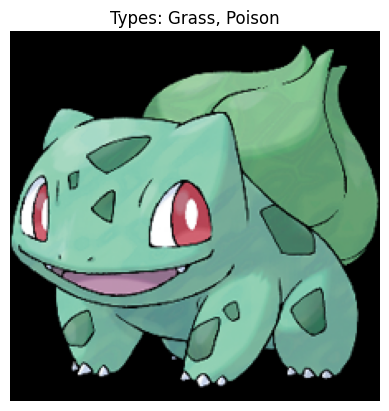

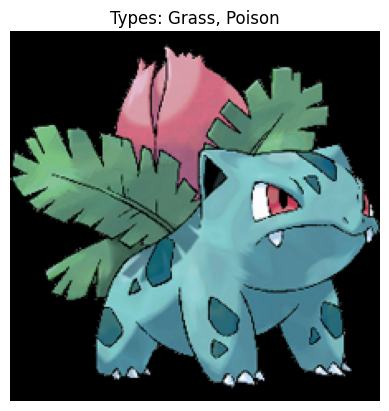

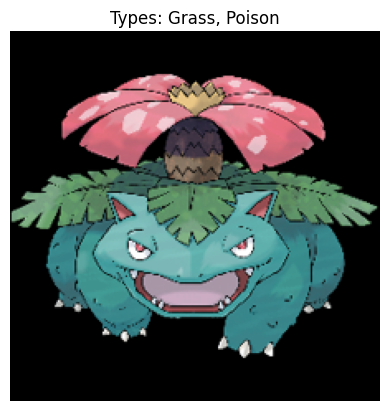

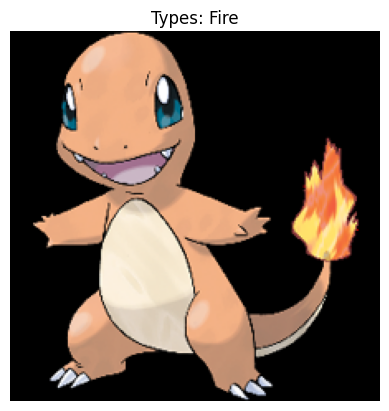

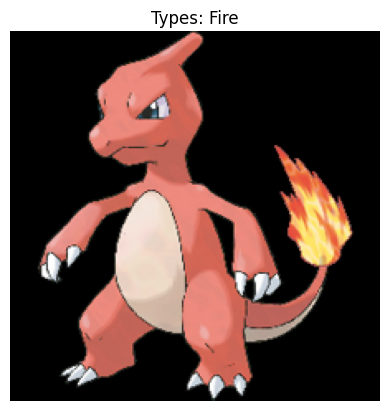

In [23]:
# viewing a few of the pictures
for i in range(5):
    show_pokemon(dataset, i, index_to_type)

### More Pre-processing

In [24]:
df.columns

Index(['filename', 'pokedex_number', 'form', 'pokemon_name', 'type_1',
       'type_2', 'type1_idx', 'type2_idx'],
      dtype='object')

In [25]:
# looking to see what types are available
df['type_1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', nan, 'Flying'], dtype=object)

In [26]:
# removing NA's
df[df['type_1'].isna()].head()

,filename,pokedex_number,form,pokemon_name,type_1,type_2,type1_idx,type2_idx
427,439.png,439,base,NaN,NaN,NaN,NaN,-1


In [27]:
df = df[~df['type_1'].isna()]

In [28]:
# checking to see if we successfully removed NAs
df['type_1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

### Defining Model

In [29]:
import torch.nn as nn
import torchvision.models as models

class PokemonTypeTopKClassifier(nn.Module):
    def __init__(self, num_types):
        super().__init__()
        self.base_model = models.resnet18(pretrained=True)
        self.base_model.fc = nn.Identity()  # remove final FC layer

        # New FC layer: takes ResNet features (512) + avg color (3)
        self.fc = nn.Sequential(
            nn.Linear(512 + 3, 128),
            nn.ReLU(),
            nn.Linear(128, num_types)
        )

    def forward(self, image, avg_color):
        features = self.base_model(image)  # shape: [batch_size, 512]
        combined = torch.cat([features, avg_color], dim=1)  # shape: [batch_size, 515]
        return self.fc(combined)


In [30]:
# Example: Grass + Poison → [0, 1, 0, ..., 1, 0]
def make_multi_hot(type1, type2, num_classes):
    target = torch.zeros(num_classes) # initializes 1D tensor for all class types
    target[type1] = 1
    if type2 != -1:
        target[type2] = 1
    return target


In [31]:
# Computes binary classification for each possible typing
criterion = nn.BCEWithLogitsLoss()

In [32]:
def evaluate_top2_hit(pred_logits, true_type1, true_type2):
    """
    Checks if either of the model's top-2 predicted type indices match the true primary or secondary type.

    Parameters:
        pred_logits (Tensor): Raw model output logits (1D tensor of shape [num_types])
        true_type1 (int): Index of the primary type label
        true_type2 (int): Index of the secondary type label (or -1 if none)

    Returns:
        bool: True if either true_type1 or true_type2 is in the top-2 predicted type indices
    """
    top2 = torch.topk(pred_logits, 2).indices.tolist()  # Get indices of top-2 predicted types
    return true_type1 in top2 or (true_type2 != -1 and true_type2 in top2)


def top2_accuracy(model, dataloader):
    """
    Computes the top-2 accuracy of a multi-label typing model over a given dataset.

    A prediction is considered correct if either of the model's top-2 predicted types
    matches any of the true type labels (primary or secondary).

    Parameters:
        model (nn.Module): The trained typing model
        dataloader (DataLoader): PyTorch DataLoader containing validation data in the form:
            (image_tensor, avg_color_tensor, label_tensor)

    Returns:
        float: Top-2 accuracy score (correct predictions / total samples)
    """
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, avg_colors, labels in dataloader:
            # Move tensors to device
            images = images.to(device)
            avg_colors = avg_colors.to(device)

            # Get model predictions (logits)
            outputs = model(images, avg_colors)  # shape: [batch_size, num_types]

            # Get top-2 predicted type indices for each sample
            top2 = torch.topk(outputs, 2, dim=1).indices  # shape: [batch_size, 2]

            for i in range(len(labels)):
                true_types = labels[i].nonzero().flatten().tolist()  # Indices of true types (multi-hot)
                predicted_top2 = top2[i].tolist()  # Top-2 predicted type indices

                # Count as correct if any true type is in the top-2 predictions
                if any(t in predicted_top2 for t in true_types):
                    correct += 1
                total += 1

    return correct / total if total > 0 else 0.0


### Loading The Dataset and Model

In [33]:
from torch.utils.data import DataLoader, random_split

# Train-Test Split
train_size = int(0.8 * len(df))
val_size = len(df) - train_size
train_df, val_df = random_split(df, [train_size, val_size], generator=torch.Generator().manual_seed(42))

train_dataset = PokemonTypeDataset(train_df.dataset.iloc[train_df.indices], "pokemon_png", num_classes=len(type_to_index))
val_dataset = PokemonTypeDataset(val_df.dataset.iloc[val_df.indices], "pokemon_png", num_classes=len(type_to_index))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


In [34]:
# Initialize the Pokémon typing classification model
# This setup includes:
#   - A neural network (CNN-based) model
#   - A binary cross-entropy loss function for multi-label classification
#   - The Adam optimizer to train the model


# Instantiate the model using the number of Pokémon types as output classes
model = PokemonTypeTopKClassifier(num_types=len(type_to_index)).to("cuda" if torch.cuda.is_available() else "cpu")

# Define the loss function for multi-label classification (one-vs-all per type)
criterion = nn.BCEWithLogitsLoss()

# Use Adam optimizer for training the model
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


e:\anaconda\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
e:\anaconda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [35]:
# Training loop for the Pokémon typing classification model
# This loop runs for a fixed number of epochs and tracks:
#   - Average training loss per epoch
#   - Validation top-2 accuracy after each epoch
# The model uses image data and average color features.


train_losses = []       # Stores average training loss per epoch
val_accuracies = []     # Stores validation top-2 accuracy per epoch

for epoch in range(10):  # Number of training epochs
    model.train()        # Set model to training mode
    total_loss = 0       # Track total loss for the epoch

    for images, avg_colors, labels in train_loader:
        # Move all tensors to the appropriate device (CPU or GPU)
        images = images.to(device)
        avg_colors = avg_colors.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()              # Reset gradients
        outputs = model(images, avg_colors)  # Forward pass through the model
        loss = criterion(outputs, labels)  # Compute loss against true labels
        loss.backward()                    # Backpropagation
        optimizer.step()                   # Update model parameters

        total_loss += loss.item()          # Accumulate batch loss

    # Calculate and store average loss for the epoch
    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)

    # Evaluate model on validation set and store accuracy
    acc = top2_accuracy(model, val_loader)
    val_accuracies.append(acc)

    # Print epoch summary
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}, Val Top-2 Accuracy: {acc:.2%}")


Epoch 1, Loss: 0.5648, Val Top-2 Accuracy: 29.50%
Epoch 2, Loss: 0.3635, Val Top-2 Accuracy: 33.81%
Epoch 3, Loss: 0.2569, Val Top-2 Accuracy: 43.17%
Epoch 4, Loss: 0.2063, Val Top-2 Accuracy: 46.76%
Epoch 5, Loss: 0.1693, Val Top-2 Accuracy: 48.92%
Epoch 6, Loss: 0.1442, Val Top-2 Accuracy: 51.08%
Epoch 7, Loss: 0.1151, Val Top-2 Accuracy: 55.40%
Epoch 8, Loss: 0.0941, Val Top-2 Accuracy: 55.40%
Epoch 9, Loss: 0.0757, Val Top-2 Accuracy: 58.27%
Epoch 10, Loss: 0.0611, Val Top-2 Accuracy: 52.52%


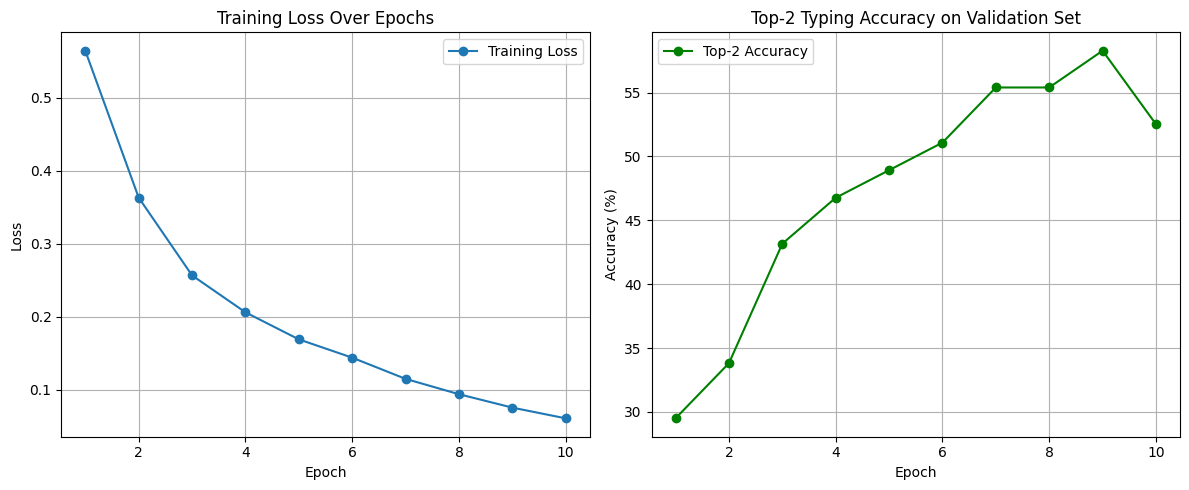

In [36]:
import matplotlib.pyplot as plt

# Define the x-axis as a list of epoch numbers
epochs = list(range(1, len(train_losses) + 1))

# Create a side-by-side plot layout
plt.figure(figsize=(12, 5))

# 📉 Plot training loss per epoch
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, marker='o', label='Training Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.grid(True)
plt.legend()

# 📈 Plot validation top-2 accuracy (as a percentage)
plt.subplot(1, 2, 2)
plt.plot(epochs, [a * 100 for a in val_accuracies], marker='o', color='green', label='Top-2 Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Top-2 Typing Accuracy on Validation Set")
plt.grid(True)
plt.legend()

# Adjust spacing between plots for better layout
plt.tight_layout()

# Show the combined figure
plt.show()


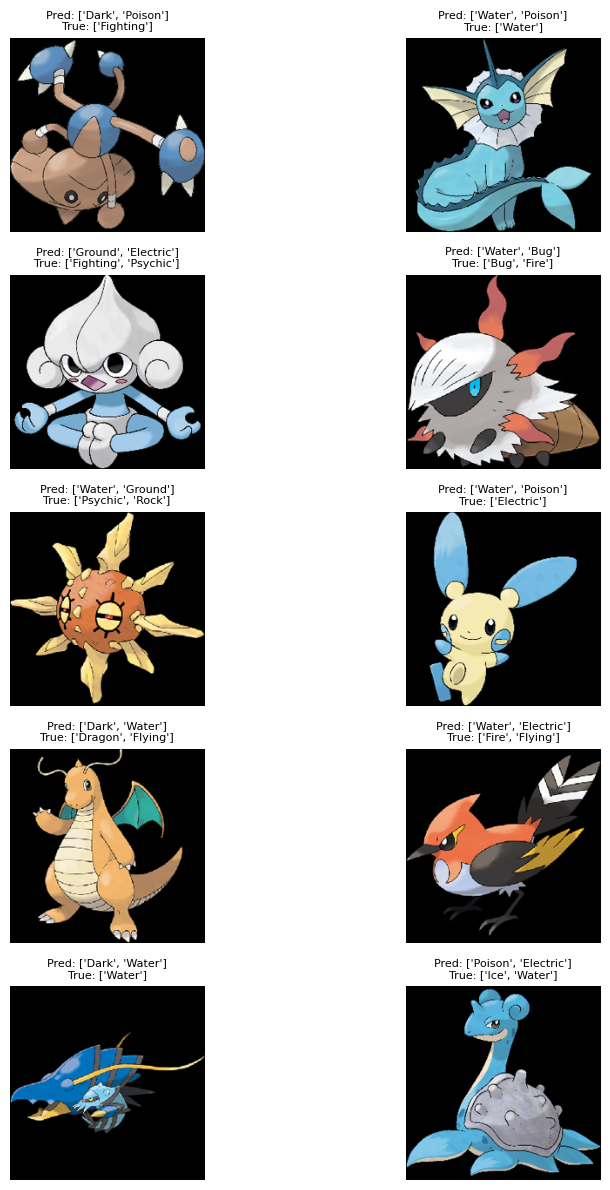

In [37]:
# -------------------------------------------------------------
# Prediction and visualization: Display random Pokémon images
# along with their predicted top-2 typing and actual true types.
# -------------------------------------------------------------

# Import necessary libraries
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import random

# Set device to GPU if available, otherwise use CPU
device = "cuda" if torch.cuda.is_available() else "cpu"

# Define number of output classes based on type index dictionary
num_classes = len(type_to_index)

# Initialize the model and move it to the selected device
model = PokemonTypeTopKClassifier(num_types=num_classes).to(device)

# -------------------------------------------------------------
# Function to plot sample predictions from the validation set
# It randomly selects 10 Pokémon, runs predictions, and displays:
#   - The input image
#   - Predicted top-2 types
#   - True label types
# -------------------------------------------------------------
def plot_sample_predictions(model, dataset, index_to_type, device="cpu"):
    model.eval()  # Set model to evaluation mode
    indices = random.sample(range(len(dataset)), 10)  # Pick 10 random samples

    fig, axes = plt.subplots(5, 2, figsize=(10, 12))  # 5x2 grid of subplots
    axes = axes.flatten()

    with torch.no_grad():  # No gradient computation needed
        for ax, idx in zip(axes, indices):
            # Get data from dataset
            image_tensor, avg_color_tensor, label_vector = dataset[idx]

            # Add batch dimension and move to device
            image_input = image_tensor.unsqueeze(0).to(device)
            avg_color_input = avg_color_tensor.unsqueeze(0).to(device)

            # Get model predictions and extract top-2 type indices
            output = model(image_input, avg_color_input).squeeze(0)
            top2_preds = torch.topk(output, 2).indices.tolist()

            # Decode true label and prediction indices to type names
            true_types = label_vector.nonzero().flatten().tolist()
            true_type_names = [index_to_type[t] for t in true_types]
            pred_type_names = [index_to_type[p] for p in top2_preds]

            # Convert tensor to image format and display
            img_np = image_tensor.permute(1, 2, 0).numpy()
            ax.imshow(img_np)
            ax.axis('off')
            ax.set_title(f"Pred: {pred_type_names}\nTrue: {true_type_names}", fontsize=8)

    # Adjust layout and render the plot
    plt.tight_layout()
    plt.show()

# Run the visualization function
plot_sample_predictions(model, val_dataset, index_to_type, device=device)


### Per Typing Accuracy Analysis

In [38]:
# Evaluating which typing was the hardest for our model to classify

type_hits = np.zeros(num_classes)
type_totals = np.zeros(num_classes)

model.eval()
with torch.no_grad():
    for i in range(len(val_dataset)):
        img, avg_color, label = val_dataset[i]

        # Move to device and wrap in batch dimension
        img = img.unsqueeze(0).to(device)
        avg_color = avg_color.unsqueeze(0).to(device)

        # Run model prediction
        output = model(img, avg_color).squeeze(0)
        top2 = torch.topk(output, 2).indices.tolist()

        # Update hit count for each true type in the label
        for t in label.nonzero().flatten().tolist():
            type_totals[t] += 1
            if t in top2:
                type_hits[t] += 1

# Print accuracy for each type
print("\nPer-Type Top-2 Accuracy:")
for i in range(num_classes):
    type_name = index_to_type[i]
    acc = type_hits[i] / max(1, type_totals[i])
    print(f"{type_name:<10}: {acc:.2%}")




Per-Type Top-2 Accuracy:
Bug       : 33.33%
Dark      : 16.67%
Dragon    : 0.00%
Electric  : 40.00%
Fairy     : 0.00%
Fighting  : 0.00%
Fire      : 0.00%
Flying    : 14.29%
Ghost     : 0.00%
Grass     : 0.00%
Ground    : 30.77%
Ice       : 0.00%
Normal    : 0.00%
Poison    : 30.77%
Psychic   : 0.00%
Rock      : 0.00%
Steel     : 0.00%
Water     : 60.87%


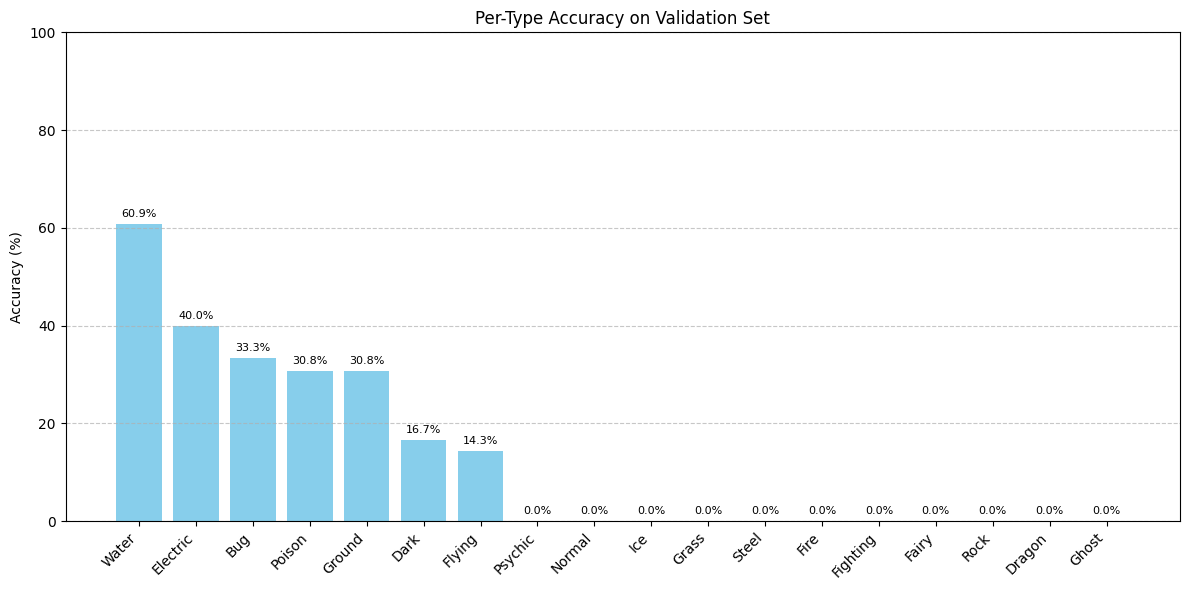

In [39]:
import matplotlib.pyplot as plt

# Prepare data for plotting
type_names = [index_to_type[i] for i in range(num_classes)]
type_accuracies = type_hits / np.maximum(type_totals, 1)

# Sort by accuracy for better visualization
sorted_indices = np.argsort(type_accuracies)[::-1]
sorted_names = [type_names[i] for i in sorted_indices]
sorted_accuracies = type_accuracies[sorted_indices]

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_names, sorted_accuracies * 100, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy (%)")
plt.title("Per-Type Accuracy on Validation Set")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add accuracy labels above each bar
for bar, acc in zip(bars, sorted_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             f"{acc * 100:.1f}%", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


### Distribution of Primary Typings in Dataset

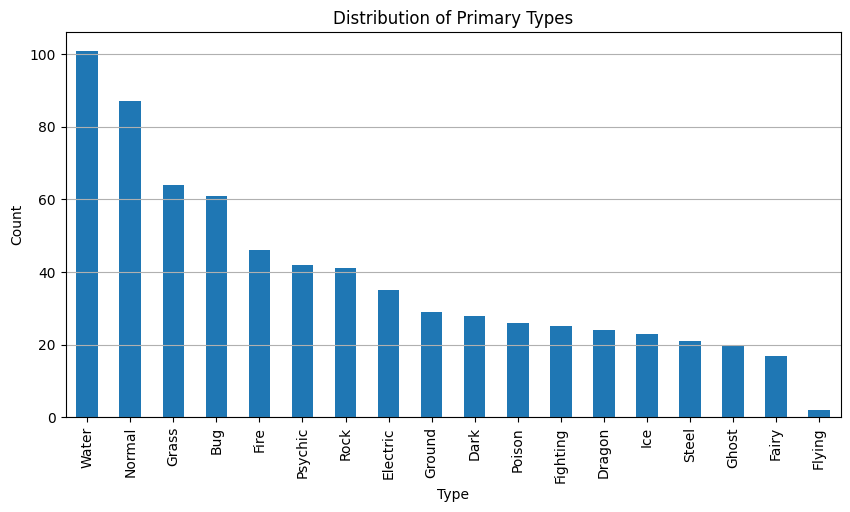

In [40]:
from collections import Counter
type1_counts = df['type_1'].value_counts()
type1_counts.plot(kind='bar', figsize=(10, 5), title="Distribution of Primary Types")
plt.ylabel("Count")
plt.xlabel("Type")
plt.grid(axis='y')
plt.show()

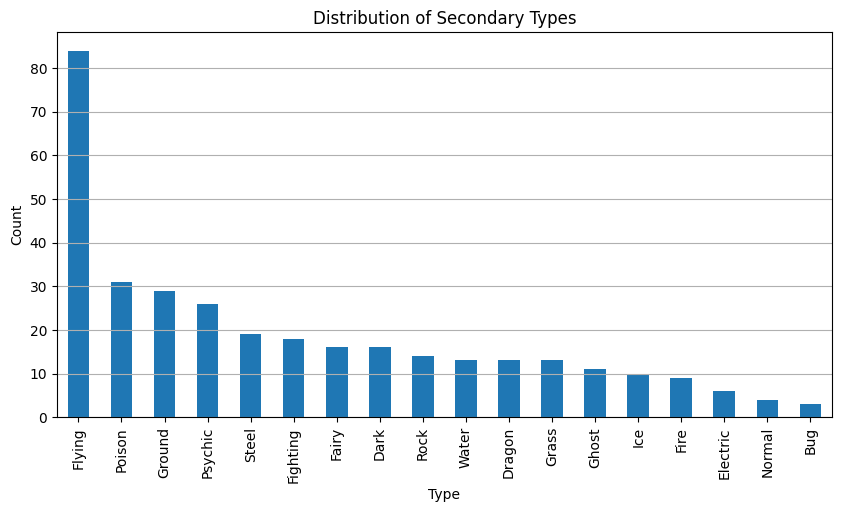

In [41]:
from collections import Counter
type1_counts = df['type_2'].value_counts()
type1_counts.plot(kind='bar', figsize=(10, 5), title="Distribution of Secondary Types")
plt.ylabel("Count")
plt.xlabel("Type")
plt.grid(axis='y')
plt.show()

### Using K-Means Clustering Labeled Color Typings

In [42]:
# Custom PyTorch Dataset for Pokémon Typing Classification
# This dataset returns:
#   - Image tensor [3, 224, 224]
#   - Average RGB color vector [3]
#   - K-Means cluster ID (based on average color)
#   - Multi-hot target label for type(s)

class PokemonTypeDataset(Dataset):
    def __init__(self, df, image_dir, num_classes):
        """
        Initializes the dataset with the DataFrame, image directory, and number of output classes.

        Parameters:
            df (DataFrame): The dataset with columns like 'filename', 'type1_idx', 'type2_idx', and 'color_cluster'
            image_dir (str): Path to the directory containing the Pokémon images
            num_classes (int): Number of Pokémon type classes (output dimension)
        """
        self.df = df.reset_index(drop=True)  # Ensure clean indexing
        self.image_dir = image_dir
        self.num_classes = num_classes

    def __len__(self):
        """Returns the number of samples in the dataset"""
        return len(self.df)

    def __getitem__(self, idx):
        """
        Returns a single sample from the dataset:
        - Preprocessed image
        - Average RGB color tensor
        - Cluster ID tensor
        - Multi-hot encoded label tensor
        """
        row = self.df.iloc[idx]
        img_path = os.path.join(self.image_dir, row["filename"])

        # Load and preprocess image (normalize to [0, 1], resize to 224x224)
        img = Image.open(img_path).convert("RGB").resize((224, 224))
        img_np = np.array(img).transpose(2, 0, 1) / 255.0  # Convert to CHW and normalize
        img_tensor = torch.tensor(img_np, dtype=torch.float32)

        # Compute average RGB color vector from the image
        avg_color = img_np.mean(axis=(1, 2))  # shape: [3]
        avg_color_tensor = torch.tensor(avg_color, dtype=torch.float32)

        # Create multi-hot target label for primary and (optional) secondary types
        type1 = int(row["type1_idx"])
        type2 = int(row["type2_idx"])
        target = torch.zeros(self.num_classes, dtype=torch.float32)
        if type1 >= 0:
            target[type1] = 1
        if type2 >= 0:
            target[type2] = 1

        # Retrieve the color-based K-Means cluster ID
        cluster_id = int(row["color_cluster"])
        cluster_tensor = torch.tensor(cluster_id, dtype=torch.long)

        return img_tensor, avg_color_tensor, cluster_tensor, target



In [43]:
# loading dataset
dataset = PokemonTypeDataset(df, image_dir="pokemon_png", num_classes=len(type_to_index))

In [44]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from collections import Counter

# Step 1: Compute average RGB color for each image
avg_colors = []
for fname in df['filename']:
    img_path = os.path.join(image_dir, fname)
    img = Image.open(img_path).convert("RGB").resize((224, 224))
    img_np = np.array(img) / 255.0  # HWC, float32
    avg_rgb = img_np.mean(axis=(0, 1))  # shape [3]
    avg_colors.append(avg_rgb)

X = np.stack(avg_colors)  # shape [N, 3]

In [45]:
# Step 2: KMeans clustering based on average color
k = len(type_to_index)  # one cluster per type
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X)
df['color_cluster'] = cluster_labels  # assign to DataFrame

In [46]:
# Step 3: Assign primary-type-based cluster typings (1-hot per cluster)
cluster_typings = np.zeros((k, len(type_to_index)), dtype=int)

for cluster_id in range(k):
    subset = df[df['color_cluster'] == cluster_id]
    type1_indices = subset['type1_idx'].dropna().astype(int).tolist()

    if type1_indices:
        most_common_type = Counter(type1_indices).most_common(1)[0][0]
        cluster_typings[cluster_id][most_common_type] = 1

In [47]:
# Print cluster label-to-type mapping
index_to_type = {v: k for k, v in type_to_index.items()}

for i in range(k):
    type_idx = np.argmax(cluster_typings[i])
    print(f"Cluster {i} → {index_to_type[type_idx]}")

Cluster 0 → Fire
Cluster 1 → Grass
Cluster 2 → Water
Cluster 3 → Water
Cluster 4 → Normal
Cluster 5 → Water
Cluster 6 → Water
Cluster 7 → Fire
Cluster 8 → Normal
Cluster 9 → Normal
Cluster 10 → Water
Cluster 11 → Water
Cluster 12 → Grass
Cluster 13 → Electric
Cluster 14 → Ice
Cluster 15 → Rock
Cluster 16 → Normal
Cluster 17 → Ice


We can see from the above results that if we use K-Means clustering for just primary typings that there are multiple clusters where Water, Normal, Grass, and Fire appear and that Ghost, Poison, Fairy, Steel, Dark, Psychic, and Dragon are not even mentioned. This could explain why our model is having some difficulty with predicting pokemon typings. 

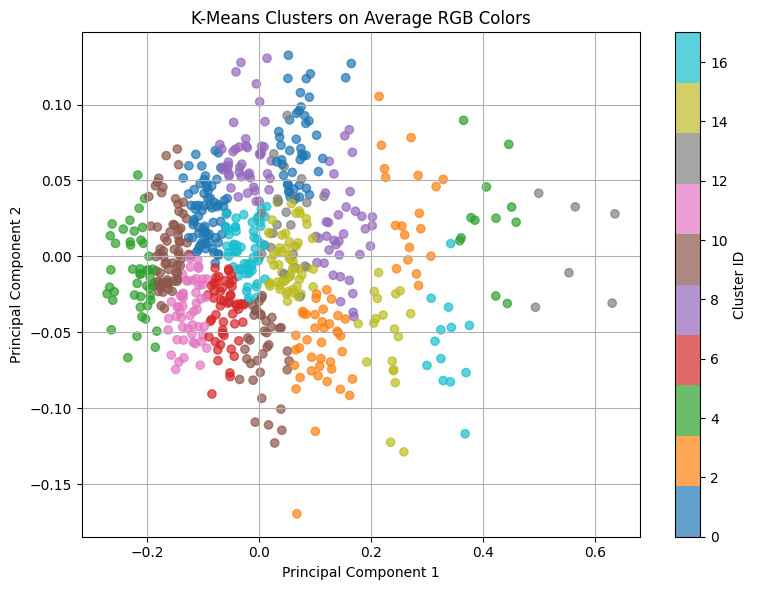

In [48]:
from sklearn.decomposition import PCA

# Step 4: Visualize clusters using PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=cluster_labels, cmap="tab10", alpha=0.7)
plt.title("K-Means Clusters on Average RGB Colors")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label="Cluster ID")
plt.grid(True)
plt.tight_layout()
plt.show()

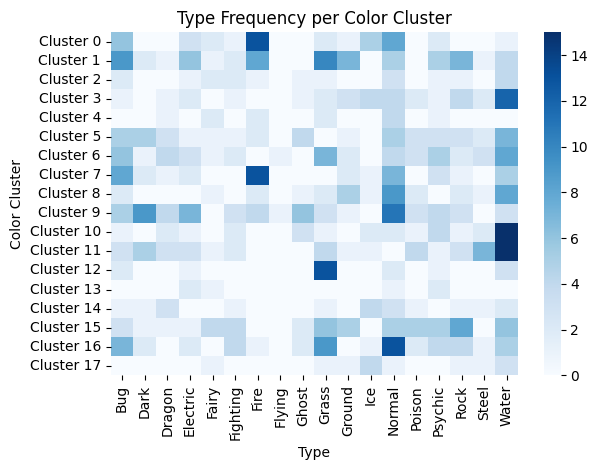

In [49]:
import seaborn as sns

type_names = sorted(df['type_1'].dropna().unique())
type_to_index = {t: i for i, t in enumerate(type_names)}
index_to_type = {i: t for t, i in type_to_index.items()}

# Update numeric columns in df
df["type1_idx"] = df["type_1"].map(type_to_index)
num_classes = len(type_to_index)


# Create matrix
heatmap_matrix = np.zeros((k, num_classes))

# Fill in matrix by counting primary type occurrences per cluster
for i in range(len(df)):
    cluster = df.iloc[i]["color_cluster"]
    type_idx = df.iloc[i]["type1_idx"]
    if pd.notna(type_idx):
        heatmap_matrix[int(cluster), int(type_idx)] += 1

# Plot
sns.heatmap(
    heatmap_matrix,
    annot=False,
    cmap="Blues",
    xticklabels=[index_to_type[i] for i in range(num_classes)],
    yticklabels=[f"Cluster {i}" for i in range(k)]
)
plt.xlabel("Type")
plt.ylabel("Color Cluster")
plt.title("Type Frequency per Color Cluster")
plt.tight_layout()
plt.show()